In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from scipy import stats
import seaborn as sns

import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
import datetime as dt

"""
INFO OM DATA:
    
    
TurId: Unique id for the tour (trip). A trip is a journey from one stop to the next one	
Dato: date
Fylke: County
Område: Area
Kommune: Municipality	
Holdeplass_Fra: from_stop	
Holdeplass_Til: to_stop		
Linjetype: local bus or a school bus	
Linjefylke: county	
Linjenavn: bus number	
Linjeretning: This is the direction of the bus (e.g when bus 21 
(Helsfyr - Tjuvholmen) drives  towards helsfyr this setting is 0 and on 
the second return trip when it goes towards Tjuvholmen, this setting is 1)
	
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra: actual arrival time
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra	: actual departure time
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra: planned arrival time	
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra: planned departure time	
Kjøretøy_Kapasitet: planned capacity for buss	
Passasjerer_Ombord: actual capacity
"""

In [13]:
rutermain = pd.read_csv('Ruter_data.csv', sep = ';')

buss = pd.DataFrame(rutermain.loc[(rutermain['Linjenavn'] == '31')])
#Isolating buss 31

buss.drop(['TurId','Fylke', 'Område', 'Kommune', 'Linjetype', 'Linjefylke', 'Kjøretøy_Kapasitet',
           'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra','Tidspunkt_Faktisk_Avgang_Holdeplass_Fra',
           'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra', 'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra',
           'Holdeplass_Fra', 'Holdeplass_Til', 'Linjenavn', 'Linjeretning'], axis = 1, inplace = True)

#Cleaning the data and removing every unnecessary variable
buss[['dag','måned','år',]] = buss.Dato.str.split("/", expand = True)
#Converting date to a format that LinearRegression accepts

passasjerersum = buss.set_index('dag').groupby('dag')['Passasjerer_Ombord'].sum().reset_index()
#Sums up all passangers, both on and off the bus for each day

antall = passasjerersum.loc[(passasjerersum['Passasjerer_Ombord'] > 0)]
#Excludes days where the sum is 0

x = antall.drop('Passasjerer_Ombord', axis = 1)
#Independent variables

y = antall['Passasjerer_Ombord']
#Dependant variable

regObj = linear_model.LinearRegression()
regObj.fit(x,y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
logmodel = LogisticRegression(max_iter = 5000)
logmodel.fit(x_train, y_train)
predictions = logmodel.predict(x_test)
conf = multilabel_confusion_matrix(y_test, predictions)

Classification Report:
               precision    recall  f1-score   support

          14       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       0.0
          26       0.00      0.00      0.00       0.0
          29       0.00      0.00      0.00       1.0
          30       0.00      0.00      0.00       1.0
          31       0.00      0.00      0.00       1.0
          36       0.00      0.00      0.00       2.0
          45       0.00      0.00      0.00       1.0
          51       0.00      0.00      0.00       1.0
          55       0.00      0.00      0.00       1.0
          62       0.00      0.00      0.00       0.0

    accuracy                           0.00       9.0
   macro avg       0.00      0.00      0.00       9.0
weighted avg       0.00      0.00      0.00       9.0

Accuracy Score:
 0.0
Predict for 30:
 [36.14408602]
Checking if coefficient + intercept i equal to predict:
 

C:\Users\MARIUSSOBARBAROSSA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MARIUSSOBARBAROSSA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


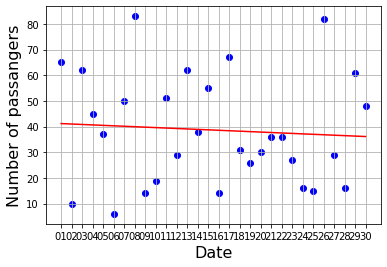

In [14]:
plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of passangers',fontsize=16)
plt.scatter(antall.dag,antall.Passasjerer_Ombord,color='blue')
plt.grid()
plt.plot(antall.dag,regObj.predict(antall[['dag']]),color='red')

print ("Classification Report:\n",(classification_report(y_test, predictions)))
print ("Accuracy Score:\n", accuracy_score(y_test, predictions))

#PROOF OF EQUATION
intercept = regObj.intercept_
coefficient = regObj.coef_

print ("Predict for 30:\n", regObj.predict([[30]]))

print ("Checking if coefficient + intercept i equal to predict:\n", coefficient*(30)+intercept)